<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3
*Repeat the steps of the prostate cancer example in Section 3.2.1 using Python, first as a uni-variate problem using the book's data set and then as a multi-variate problem with data from your own project. Calculate also the p-values and the confidence intervals for the model's coefficients for the uni-variate version. Experiment, using libraries, also with subset selection.*

Los datos utilizados en este cuaderno están disponibles aquí: [datasets](https://drive.google.com/drive/folders/159GnBJQDxTY9oYqPBZzdNghyb4Gd9pDS?usp=sharing) 


In [131]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats
import statsmodels.api as sm

## Regresión líneal en cáncer de próstata
A continuación usaremos un modelo de regresión líneal para resolver el problema de ZIP-code [2,3] del libro [liga](https://link.springer.com/book/10.1007/978-0-387-84858-7).

Iniciamos cargando los datos de entrenamiento y almacenando en $X$ y $Y$:

In [132]:
df = pd.read_csv('prostata.csv') #https://github.com/maitbayev/the-elements-of-statistical-learning/blob/master/data/prostate/prostate.info
## Datos de entrenamiento 
df1 = df.loc[df.iloc[:,10].isin(['T'])] ## T = training set
df2 = df1['lpsa']
df1 = df1[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
X  = df1.to_numpy() ## Predictors
Y  = df2.to_numpy() ## Outcome

Ahora, cargamos los datos de prueba en los arreglos $Xt$ y $Yt$:

In [133]:
## Datos de prueba 
dft = df.loc[df.iloc[:,10].isin(['F'])] ## F = test set
dft2 = dft['lpsa']
dft1 = dft[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
Xt  = dft1.to_numpy() ## Predictors
Yt  = dft2.to_numpy() ## Outcome

A continuación, obtenemos un modelo de predicción de los datos de entrenamiento usando regresión lineal. Posteriomente, calculamos los errores entre la predicción `y_pred` y los datos de entrenamiento $Y$. Los errores de la predicción con datos de entrenamiento son representados por un histograma.

In [134]:
model = LinearRegression().fit(X, Y) #https://realpython.com/linear-regression-in-python/
y_pred = model.predict(X)
error = Y - y_pred
df = pd.DataFrame(error,Y) #df.to_csv('error.csv')
err_regress = mean_absolute_error(Y,y_pred)

In [135]:
def dibuja_hist(df,colour,name,Xlabel,Ylabel,title):
    plt.figure()
    df.hist(column=0, bins=25, grid=False, figsize=(6,3), color=colour, zorder=2, rwidth=0.9)
    plt.xticks(rotation=90)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    #https://stackoverflow.com/questions/9662995/matplotlib-change-title-and-colorbar-text-and-tick-colors/42020486
    mytitle = plt.title(title) # get the title property handler   #plt.getp(title_obj)  
    plt.setp(mytitle, color='#ff8000')                            # set the color of title
    myax = plt.axes()   # get the axis property handler           # plt.getp(myax) print its propieties
    myax.xaxis.label.set_color('#ff8000')
    myax.yaxis.label.set_color('#ff8000')
    myax.tick_params(colors='#ff8000', which='both')              # myax.spines['bottom'].set_color('yellow')
    plt.savefig(name, transparent=True)
    plt.show() # o plt.save_en_algún_formato()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

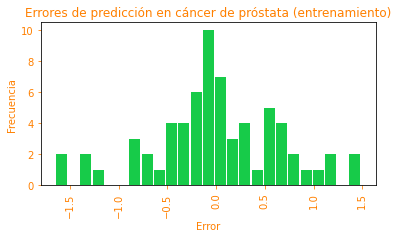

In [136]:
dibuja_hist(df,colour='#17cb49',name='hist1.png',Xlabel="Error",Ylabel="Frecuencia",title="Errores de predicción en cáncer de próstata (entrenamiento)")
#df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#17cb49', zorder=2, rwidth=0.9)

Ahora, utilizamos el modelo obtenido con los datos de entrenamiento para predecir los datos de prueba. Además,  calculamos los errores entre la predicción `y_pred2` y los datos de prueba $Yt$. Los errores de la predicción con datos de prueba son representados por un histograma.

In [137]:
y_pred2 = model.predict(Xt)
error2 = Yt - y_pred2
df = pd.DataFrame(error2,Yt) #df.to_csv('error2.csv')
err_regress_t = mean_absolute_error(Yt,y_pred2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

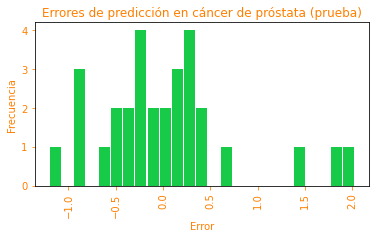

In [138]:
dibuja_hist(df,colour='#17cb49',name='hist2.png',Xlabel="Error",Ylabel="Frecuencia",title="Errores de predicción en cáncer de próstata (prueba)")
#df.hist(column=0, bins=25, grid=False, figsize=(6,3), color='#17cb49', zorder=2, rwidth=0.9)

Por último calculamos el **error absoluto medio (MAE)** de los datos de entrenamiento así como de los datos de prueba.

In [139]:
print("MAE del modelo de regresión con datos de entrenamiento:", err_regress)
print("MAE del modelo de regresión con datos de prueba:", err_regress_t) 

MAE del modelo de regresión con datos de entrenamiento: 0.49861362344949917
MAE del modelo de regresión con datos de prueba: 0.523371942676903
